### 1. Import datasets and merg all cities data
first we import the required librarires to start our analysis.

In [440]:
# Standard Libraries
import pandas as pd
import os
import numpy as np
from collections import Counter

#Viz Libraries
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud
import plotly.graph_objs as go

# Geolocation Libraries
from geopy.geocoders import Nominatim

#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from scipy import stats

path=os.getcwd()
os.chdir(r'/Users/mahdieh/desktop/opentable')

now we are going to load our data sets for five different cities using pandas. Using for loop ato save all dataset in one list

In [441]:
filenames=[]
for file in os.listdir("/Users/mahdieh/desktop/opentable"):
    if file.endswith(".csv"):
        filenames.append(os.path.join(file))
filenames

['phoenix.csv',
 'new-york.csv',
 'locations.csv',
 'chicago.csv',
 'phil.csv',
 'locationss.csv',
 'houston.csv']

In [442]:
#reading all csv files in the file list with loop
dataframes=[]
for i in filenames:
    dataframes.append(pd.read_csv(i))
   

I simply prefer to read them individualy in order to prevent more complication to follow through whole analysis process

In [470]:
# to read every file separately
df_houston = pd.read_csv("Houston.csv")
df_houston["city"]= "Houston"

df_newyork = pd.read_csv("new-york.csv")
df_newyork["city"]= "Newyork"

df_phil = pd.read_csv("Phil.csv")
df_phil["city"]= "Philadelphia"

df_phoenix = pd.read_csv("Phoenix.csv")
df_phoenix["city"]= "Phoenix"

df_chicago = pd.read_csv("chicago.csv")
df_chicago["city"]= "Chicago"

In [471]:
df = pd.concat ([df_houston,df_newyork,df_phil,df_phoenix,df_chicago])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22890 entries, 0 to 3427
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      22890 non-null  object 
 1   bookings  1619 non-null   float64
 2   rating    6254 non-null   object 
 3   reviews   6254 non-null   object 
 4   price     22890 non-null  int64  
 5   cuisine   22890 non-null  object 
 6   location  22889 non-null  object 
 7   city      22890 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.6+ MB


to get the grasb of our data , let's take a look at our columns, data and and see the list of headers using head function

In [472]:
headers=list(df.columns.values)
# or simply
list(df_newyork)

['name',
 'bookings',
 'rating',
 'reviews',
 'price',
 'cuisine',
 'location',
 'city']

In [473]:
df.shape

(22890, 8)

In [474]:
df.head()

,name,bookings,rating,reviews,price,cuisine,location,city
0,Liberty Kitchen and Oysterette,40.0,4.7 stars out of 5,Exceptional,3,Seafood,River Oaks,Houston
1,Perry's Steakhouse & Grille - River Oaks,39.0,4.6 stars out of 5,Exceptional,4,Steakhouse,River Oaks,Houston
2,MAX's Wine Dive Houston - Washington Ave.,40.0,4.8 stars out of 5,Exceptional,2,American,Heights / Washington,Houston
3,Brenner's Steakhouse on the Bayou,58.0,4.6 stars out of 5,Exceptional,2,Steakhouse,River Oaks,Houston
4,Peli Peli South African Kitchen - Galleria,39.0,4.5 stars out of 5,Awesome,2,Seafood,Galleria / Uptown,Houston


By looking at the dataset, it's possible to see the meaning of each columns of the data. Just to allign the concepts, we have:

$name$:
contains the name of the restaurant;

$booking$:
number of bookings made in specific day;

$rate$:
contains the overall rating of the restaurant out of 5;

$review$:conyains the overall review of the restaurant

$location$:
contains the neighborhood in which the restaurant is located;

$cuisine$: restaurant type;

$cost$: the price range for the restuarant

$city$


We will need to transform some columns such as price to a dollar value.

### 2. How many missing values are in columns?


As we see in the above table, there are 7 columns in our dataset. in order to examine if there are missing value in the data, specially booking column.  it's required a couple of steps to work with missing data are identify and deal missing data and correct data format. To identify missing values we use isnull. the output is a boolean value(i.e. True or False) showing the missing one as True.
By using a for loop we can count the missing values in each columns.i.e the number True

In [475]:
missing_data = df.isnull()

In [476]:
#to print the columns headers or 
#for column in missing_data.columns.values.tolist():
for names in list(missing_data):
    print(names)
    # count the true and false value in each column
    print (missing_data[names].value_counts())
    print("")

name
False    22890
Name: name, dtype: int64

bookings
True     21271
False     1619
Name: bookings, dtype: int64

rating
True     16636
False     6254
Name: rating, dtype: int64

reviews
True     16636
False     6254
Name: reviews, dtype: int64

price
False    22890
Name: price, dtype: int64

cuisine
False    22890
Name: cuisine, dtype: int64

location
False    22889
True         1
Name: location, dtype: int64

city
False    22890
Name: city, dtype: int64



it seems there are a quite a lot resturants which are not booked in new year's eve. we can also see the some restaurant does not have any review and rating in opentable website.

### How to deal with missing data?
1. drop the data
2. replace the data by means or frequency
For booking column we will drop the whole row:
Reason: booking is what we want to predict. Any data entry without booking data cannot be used for prediction; therefore any row now without booking data is not useful to us

In [477]:
#simply drop whole row with NaN in "price" column
df1=df.copy()
df1.dropna(subset=["bookings", "location"], axis=0, inplace=True)
df.dropna(subset=["location"], axis =0 , inplace = True)
# reset index, because we droped 5320 rows
#df.reset_index(drop=True, inplace=True)

let's see if we drop the reatuarants booked, how many of them have no reviews or rating.

In [478]:
missing_data1 = df1.isnull()
for names in list(missing_data1):
    print(names)
    # count the true and false value in each column
    print (missing_data1[names].value_counts())
    print("")

name
False    1619
Name: name, dtype: int64

bookings
False    1619
Name: bookings, dtype: int64

rating
False    1584
True       35
Name: rating, dtype: int64

reviews
False    1584
True       35
Name: reviews, dtype: int64

price
False    1619
Name: price, dtype: int64

cuisine
False    1619
Name: cuisine, dtype: int64

location
False    1619
Name: location, dtype: int64

city
False    1619
Name: city, dtype: int64



the number of missing value in reviews at first was 16636 but now it drops to 35, it shows that 35 restaurant with no reviews and rating had not been booked. It wasnot hard to guess, people will not choose restarant which have no reviews on opentable website. however it's intersting to see that there are 35 restauants with no reviews and rating but still has been booked. we will not removed theses restaurant at this stage, until we see what factors motivate people to book in these location.

### does the review abscenties are related to expensive one? Let's see.

In [479]:
df2=df.copy()
df_new= df1.loc[(df1['rating'].isnull()) & (df1['reviews'].isnull())]

# reset index, because we picked rows out of the main dataframe
df_new.reset_index(drop=True, inplace=True)
df_new['price'].replace(to_replace = [2, 3, 4], 
                            value =["$30 and under","$31 to 50","$50 and over"], inplace=True)
df_new

/Users/mahdieh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,name,bookings,rating,reviews,price,cuisine,location,city
0,The Sporting Club,1.0,NaN,NaN,$30 and under,American,Rice Village,Houston
1,Ume Sushi Heights,27.0,NaN,NaN,$50 and over,Sushi,Heights / Washington,Houston
2,Ramble Creek Grill,2.0,NaN,NaN,$30 and under,Creole / Cajun / Southern,Richmond,Houston
3,Red Lobster - Lufkin,1.0,NaN,NaN,$30 and under,Seafood,East Texas,Houston
4,Sugar Factory Broadway,63.0,NaN,NaN,$31 to 50,American,Upper West Side,Newyork
5,Osteria Nando,11.0,NaN,NaN,$31 to 50,Mediterranean,Upper East Side,Newyork
6,PRIME CATCH,5.0,NaN,NaN,$31 to 50,Steakhouse,Midtown West,Newyork
7,Iris,2.0,NaN,NaN,$31 to 50,Mediterranean,Midtown West,Newyork
8,Ammos Estiatorio,1.0,NaN,NaN,$31 to 50,Seafood,Midtown East,Newyork
9,Çka Ka Qellue,1.0,NaN,NaN,$30 and under,Eastern European,Murray Hill,Newyork


In [480]:
(df_new["price"].value_counts(normalize=True) * 100).round().to_frame()

,price
$30 and under,69.0
$31 to 50,26.0
$50 and over,6.0


The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).
In Pandas, we use
#### .dtype() 
to check the data type
#### .astype()
to change the data type
Lets list the data types for each column

In [481]:
df.dtypes

name         object
bookings    float64
rating       object
reviews      object
price         int64
cuisine      object
location     object
city         object
dtype: object

from the rating column , we only need the first string of the value so we are going to remove the rest. we remove the string from the end since 15 charecter from its end are the same for whole rows but not the begining. Also We have to convert data types into a proper format for each column using the "astype()" method.

In [482]:
df['rating'] = df['rating'].str.slice(0,-15)
df1['rating'] = df1['rating'].str.slice(0,-15)

In [483]:
df2['rating'] = df2['rating'].str.slice(0,-15)

Now it's time to change its type to float.

In [484]:
df[["rating"]]= df[["rating"]].astype("float")
df1[["rating"]]= df1[["rating"]].astype("float")
df2[["rating"]]= df2[["rating"]].astype("float")

The column price, at first that we scape the website we convert the  dollar  sign in the website to a number of  sign, number of dollar signs is associated with a price range as follow:

*  2 signs  >  $30 and under
   
*  3 signs  > 31 to 50
   
*  4 signs > $50 and over


In [485]:
#df_newyork["price"]=df_newyork["price"].replace({"2": "$30 and under", "3": "$31 to $50", "4": "$50 and over"},inplace=True)
df['price'].replace(to_replace = [2, 3, 4], 
                            value =["$30 and under","$31 to 50","$50 and over"], inplace=True)
df1['price'].replace(to_replace = [2, 3, 4], 
                            value =["$30 and under","$31 to 50","$50 and over"], inplace=True)

Now we remove any whitespace in restarant names,reviews,cuisine, and location and also change all letters to lowercase

In [486]:
#Stripping all text
df.name = df.name.str.strip().str.lower()
df.reviews = df.reviews.str.strip().str.lower()
df.cuisine = df.cuisine.str.strip().str.lower()
df.location =df.location.str.strip().str.lower()


In [487]:
df1.name = df1.name.str.strip().str.lower()
df1.reviews = df1.reviews.str.strip().str.lower()
df1.cuisine = df1.cuisine.str.strip().str.lower()
df1.location =df1.location.str.strip().str.lower()
df1.head()

,name,bookings,rating,reviews,price,cuisine,location,city
0,liberty kitchen and oysterette,40.0,4.7,exceptional,$31 to 50,seafood,river oaks,Houston
1,perry's steakhouse & grille - river oaks,39.0,4.6,exceptional,$50 and over,steakhouse,river oaks,Houston
2,max's wine dive houston - washington ave.,40.0,4.8,exceptional,$30 and under,american,heights / washington,Houston
3,brenner's steakhouse on the bayou,58.0,4.6,exceptional,$30 and under,steakhouse,river oaks,Houston
4,peli peli south african kitchen - galleria,39.0,4.5,awesome,$30 and under,seafood,galleria / uptown,Houston


### How much the price of food have effect on the number of booking?

It's better to see the overall price range percentage in the pie chart.

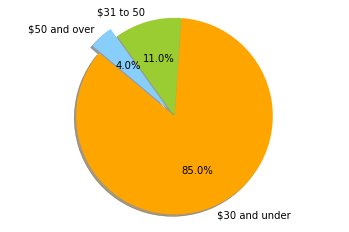

In [488]:
import matplotlib.pylab as plt
price_percentage=(df["price"].value_counts(normalize=True) * 100).round()
# Data to plot
labels = group_name=["$30 and under","$31 to 50","$50 and over"]
sizes = price_percentage
colors = ['orange', 'yellowgreen', 'lightskyblue']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### How much expensive was the price in the booked retaurant?

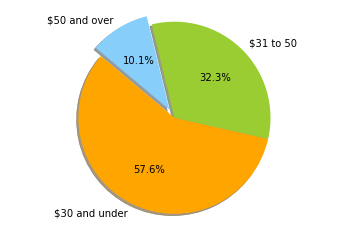

In [489]:
import matplotlib.pylab as plt
price_percentage=(df1["price"].value_counts(normalize=True) * 100).round()
group_name=["$30 and under","$31 to 50","$50 and over"]

sizes = price_percentage
colors = ['orange', 'yellowgreen', 'lightskyblue']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Although the majority (85%) of restarant listed in the website priced under $30, this percentage falls to 58% when people booked these restaurants. The retaurant in middle range outperform follows by expensive ones.

In [490]:
uniqueId = df["name"].unique() 
len(uniqueId)

19807

so people tend to buy from restauarnts with no review or rating history if and only if their price falls in lower range. in case of sugar factory broadway restaurants, it has a lot of reviews in else where, seems to be a famous one. Let's get back to the initial dataset. 
### Where are the most booked food type ?

In [491]:
grouped_cuisine = pd.DataFrame(df1.groupby('cuisine').size(),columns = ['count'])
b= grouped_cuisine.sort_values('count',ascending = False).head()

<AxesSubplot:ylabel='cuisine'>

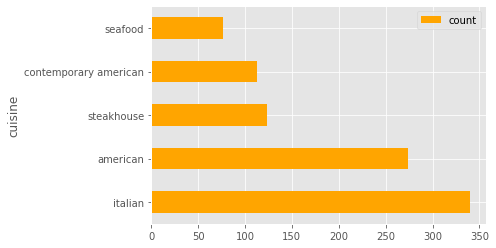

In [492]:
b.plot.barh(color="orange")

### How much rating  and reviews does affect the booking?
Let's see the correlation between them

In [493]:
df1.corr()

,bookings,rating
bookings,1.000000,0.090032
rating,0.090032,1.000000


<AxesSubplot:xlabel='rating', ylabel='bookings'>

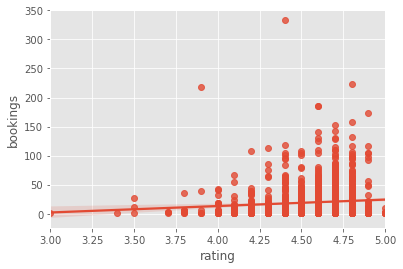

In [494]:
sns.regplot(x="rating", y="bookings", data=df1)


<AxesSubplot:xlabel='reviews', ylabel='bookings'>

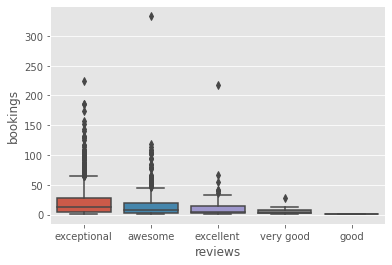

In [495]:

sns.boxplot(x="reviews", y="bookings" , data = df1)

<AxesSubplot:xlabel='reviews', ylabel='bookings'>

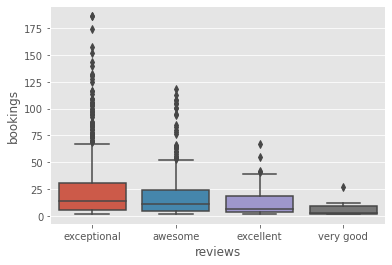

In [496]:
# removing the outlier,"bboking above 200 times" and only 1 time
df1outlier=df1[df1["bookings"]<200]
df1outlier=df1outlier[df1outlier["bookings"]>1]
sns.boxplot(x="reviews", y="bookings" , data = df1outlier)

### Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

In [497]:
df.describe()

,bookings,rating
count,1619.000000,6254.000000
mean,19.332922,4.384970
std,26.266905,0.376982
min,1.000000,3.000000
25%,4.000000,4.200000
50%,10.000000,4.500000
75%,24.000000,4.700000
max,333.000000,5.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [498]:
df.describe(include=['object'])

,name,reviews,price,cuisine,location,city
count,22889,6254,22889,22889,22889,22889
unique,19807,5,3,170,388,5
top,ihop,exceptional,$30 and under,american,"chicago, il",Newyork
freq,50,2464,19554,6806,2892,10000


In [499]:
df["reviews"].value_counts().to_frame()

,reviews
exceptional,2464
awesome,2351
excellent,1036
very good,282
good,121


In [500]:
df["price"].value_counts().to_frame()

,price
$30 and under,19554
$31 to 50,2416
$50 and over,919


In [501]:
df["cuisine"].value_counts().to_frame()

,cuisine
american,6806
italian,2290
mexican,2192
chinese,1274
grill,1056
...,...
hibachi,1
ukrainian,1
canadian,1
creole,1


In [502]:
df1["bookings"].value_counts

<bound method IndexOpsMixin.value_counts of 0       40.0
1       39.0
2       40.0
3       58.0
4       39.0
        ... 
2015     1.0
2018     1.0
2030     1.0
2031    22.0
2033     2.0
Name: bookings, Length: 1619, dtype: float64>

### How expensive are the different cuisine type?


In [503]:
exp_ones=df2.groupby(['cuisine'])['price'].mean().sort_values(ascending=False)
cheap_ones=df2.groupby(['cuisine'])['price'].mean().sort_values(ascending=False)
exp_ones

cuisine
Yakitori         4.000000
Dinner Cruise    4.000000
Egyptian         4.000000
Nordic           3.750000
Afternoon Tea    3.214286
                   ...   
Indonesian       2.000000
Irish            2.000000
Israeli          2.000000
Low Country      2.000000
Afghan           2.000000
Name: price, Length: 170, dtype: float64

In [504]:
booked_ones=df2.groupby(['cuisine'])['bookings'].mean().sort_values(ascending=False)
booked_ones

cuisine
Contemporary French / American    50.500000
Brazilian Steakhouse              42.538462
German                            41.000000
Continental                       39.500000
Fusion / Eclectic                 35.000000
                                    ...    
Teppanyaki                              NaN
Ukrainian                               NaN
Uruguayan                               NaN
Vegetarian                              NaN
Yakitori                                NaN
Name: bookings, Length: 170, dtype: float64

/Users/mahdieh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='bookings'>

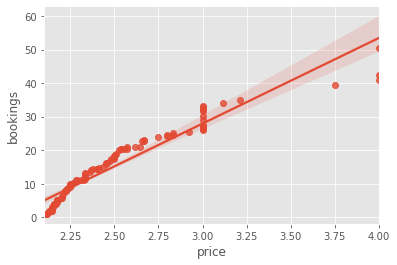

In [505]:
#exp_ones = [exp_ones < 6]
sns.regplot(exp_ones,booked_ones )

In [506]:
df_gptest = df1[['reviews','price','bookings']]
grouped_test1 = df_gptest.groupby(['reviews', 'price'],as_index=False).mean().round()
pivot=grouped_test1.pivot(index='reviews', columns='price')
pivot

bookings                       
price       $30 and under $31 to 50 $50 and over
reviews                                         
awesome              14.0      22.0         20.0
excellent            13.0      19.0          1.0
exceptional          21.0      21.0         25.0
good                  1.0       NaN          NaN
very good             6.0      12.0          NaN

It's shows that if you are selling expensive food, it defenitly need the above average reviews to attarct costumer. though it may not be the case for food under $50.

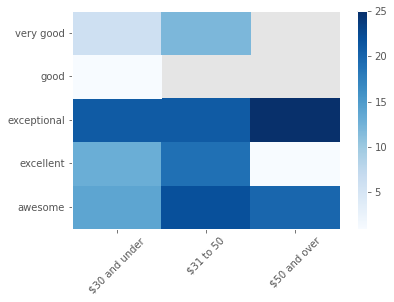

In [507]:
#use the grouped results
fig, ax = plt.subplots()
row_labels = pivot.columns.levels[1]
col_labels = pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)

plt.pcolor(pivot , cmap="Blues")
plt.colorbar()
plt.show()

#### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:
F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
P-value: P-value tells how statistically significant is our calculated score value.
If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.


In [508]:
grouped_test2=df1[['price', 'bookings']].groupby(['price'])
f_val, p_val = stats.f_oneway(grouped_test2.get_group('$30 and under')['bookings'], grouped_test2.get_group('$31 to 50')['bookings'], 
                              grouped_test2.get_group('$50 and over')['bookings'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 5.1183179395006935 , P = 0.006083500851868568


the p-value is P < 0.05: there is moderate evidence that the correlation is significant.

In [509]:
grouped_test3=df1[['reviews', 'bookings']].groupby(['reviews'])
f_val, p_val = stats.f_oneway(grouped_test3.get_group('very good')['bookings'], grouped_test3.get_group('excellent')['bookings'], 
                              grouped_test3.get_group('exceptional')['bookings'], grouped_test3.get_group('good')['bookings'], grouped_test3.get_group('awesome')['bookings'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 3.972841094961298 , P = 0.0032676522834952783


the p-value is P < 0.05: there is moderate evidence that the correlation is significant.

### Geographical Exploration

Ho many types of restuarants we have?
With figures.

(-0.5, 1279.5, 719.5, -0.5)

/Users/mahdieh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


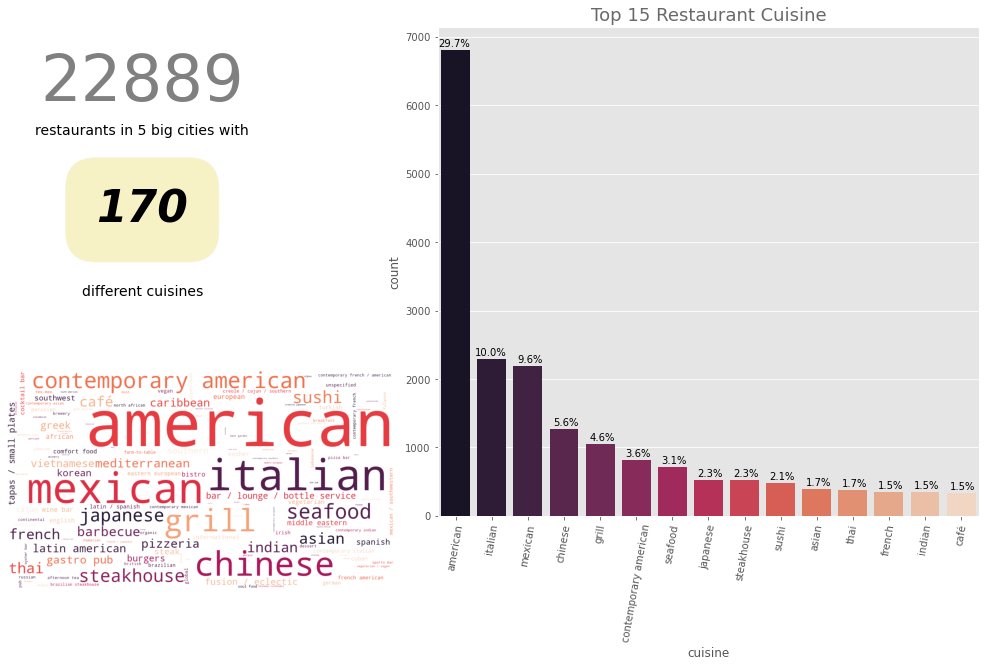

In [519]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:3])
#ax3 = fig.add_subplot(gs[0,0])
# Axis 1 - Big Number for total restaurants and total types in the data
total_restaurants = len(df)
total_types = len(df['cuisine'].value_counts())
#ax1.text(0.00, 1, 'There are', fontsize=14, ha='center')
ax1.text(0.00, 0.85, f'{total_restaurants}', fontsize=64, color='grey', ha='center')
ax1.text(0, 0.78, 'restaurants in 5 big cities with', fontsize=14, ha='center')
ax1.text(0.00, 0.6, total_types, fontsize=44, ha='center', color='black', style='italic', weight='bold',
         bbox=dict(facecolor='khaki', alpha=0.5, pad=14, boxstyle='round, pad=.7'))
ax1.text(0, 0.45, 'different cuisines', fontsize=14, ha='center')
ax1.axis('off')

# Axis 2 - Total number of restaurants per type (Top 10)

ax=sns.countplot(x="cuisine", data=df, order=df["cuisine"].value_counts().iloc[:15].index,
                 palette="rocket")
top=15
ax2.set_title(f'Top {top} Restaurant Cuisine', color='dimgrey', size=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(80)
# to put perctentage on the top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width(),
            height+50,
            '{:.1f}%'.format((height/total_restaurants)*100),
            ha="right") 
    

    
# Axis 3 - Creating a list with all options available
cuisines = list(df['cuisine'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                       background_color='white' , colormap='rocket').generate_from_frequencies(cuisines_wc_dict)

# Visualizing the WC created and the total for each cuisine

ax3 = plt.axes([0, 0, 0.36, 0.36])
ax3.imshow(wordcloud)
ax3.axis('off')    
    

(-0.5, 1279.5, 719.5, -0.5)

/Users/mahdieh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


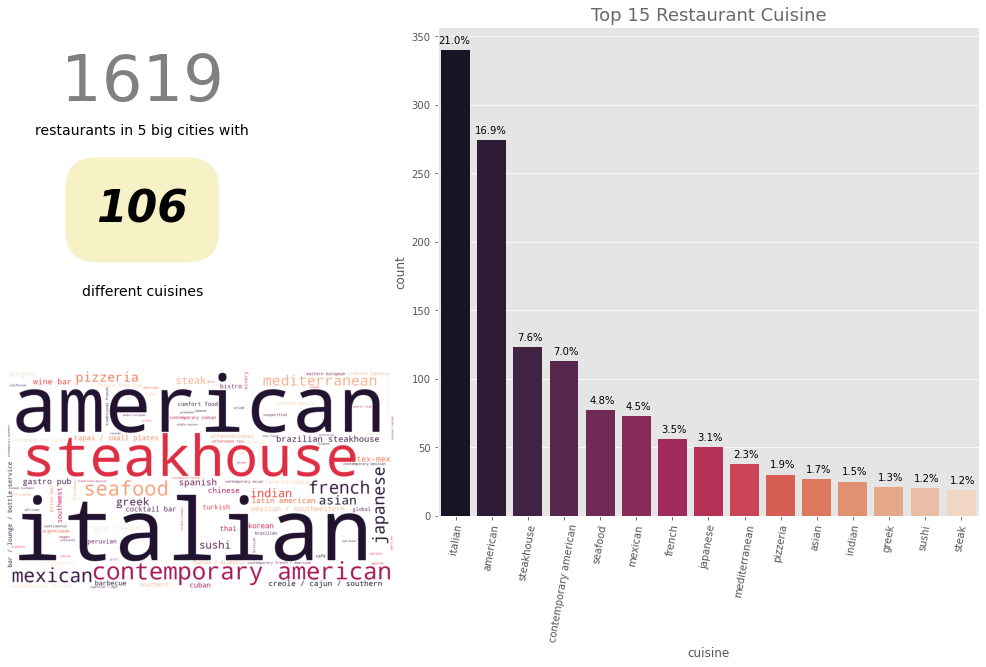

In [520]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:3])
#ax3 = fig.add_subplot(gs[0,0])
# Axis 1 - Big Number for total restaurants and total types in the data
total_restaurants = len(df1)
total_types = len(df1['cuisine'].value_counts())
#ax1.text(0.00, 1, 'There are', fontsize=14, ha='center')
ax1.text(0.00, 0.85, f'{total_restaurants}', fontsize=64, color='grey', ha='center')
ax1.text(0, 0.78, 'restaurants in 5 big cities with', fontsize=14, ha='center')
ax1.text(0.00, 0.6, total_types, fontsize=44, ha='center', color='black', style='italic', weight='bold',
         bbox=dict(facecolor='khaki', alpha=0.5, pad=14, boxstyle='round, pad=.7'))
ax1.text(0, 0.45, 'different cuisines', fontsize=14, ha='center')
ax1.axis('off')

# Axis 2 - Total number of restaurants per type (Top 10)

ax=sns.countplot(x="cuisine", data=df1, order=df1["cuisine"].value_counts().iloc[:15].index,
                 palette="rocket")
top=15
ax2.set_title(f'Top {top} Restaurant Cuisine', color='dimgrey', size=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(80)
# to put perctentage on the top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width(),
            height+5,
            '{:.1f}%'.format((height/total_restaurants)*100),
            ha="right") 
    

    
# Axis 3 - Creating a list with all options available
cuisines = list(df1['cuisine'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                       background_color='white', colormap="rocket").generate_from_frequencies(cuisines_wc_dict)

# Visualizing the WC created and the total for each cuisine

ax3 = plt.axes([0, 0, 0.36, 0.36])
ax3.imshow(wordcloud)
ax3.axis('off')    
    

### What are the most popular restaurants?

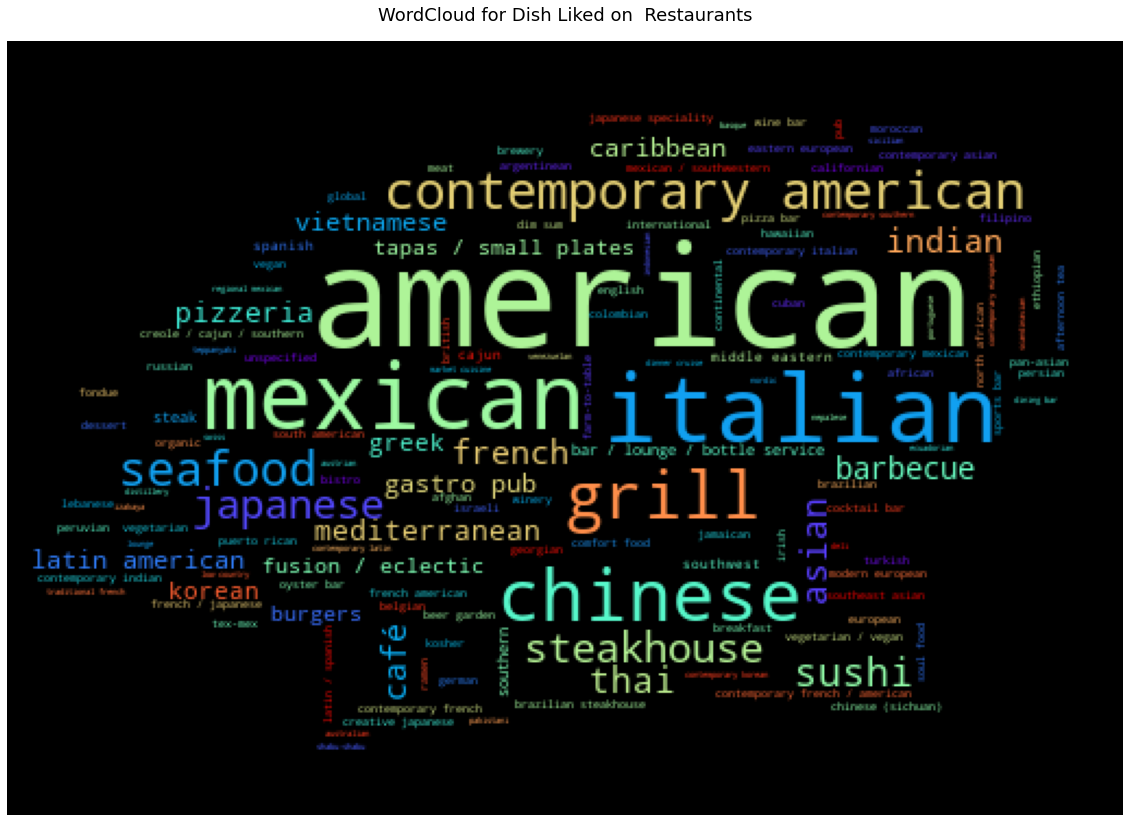

In [207]:
# Creating a list with all options available
dishes = list(df['cuisine'].dropna().astype(str).values)
dishes_word_list = []
for lista in [c.split(',') for c in dishes]:
    for word in lista:
        dishes_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
dished_wc_dict = Counter(dishes_word_list)

# Reading and preparing a mask for serving as wordcloud background
from PIL import Image
food_mask = np.array(Image.open("/users/mahdieh/desktop/opentable/hat.png"))
food_mask = food_mask[:, :, -1]
transf_mask = np.ndarray((food_mask.shape[0], food_mask.shape[1]), np.int32)
for i in range(len(food_mask)):
    transf_mask[i] = [255 if px == 0 else 0 for px in food_mask[i]]

# Generating the wordcloud    
wordcloud = WordCloud(width=1000, height=500, collocations=False, random_state=42, colormap='rainbow', 
                      background_color='black', mask=transf_mask).generate_from_frequencies(dished_wc_dict)

# Visualizing the WC created
plt.figure(figsize=(20, 17))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Dish Liked on  Restaurants', size=18, pad=20)
plt.show()


/Users/mahdieh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Count')

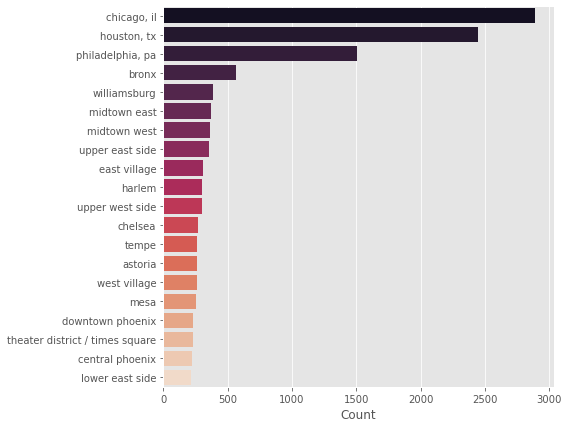

In [521]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")
plt.xlabel("Count")

In [522]:
locations=pd.DataFrame({"Name":df_chicago['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "chicago " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [535]:
# I find the missed one in Geocoding google api and replace with NaN
locations= pd.read_csv(r"locationss.csv")
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("chicago","")[1:])
locations.head()

,Name,geo_loc
0,West Loop,"(41.8816094, -87.6294574)"
1,Gold Coast / Streeterville,"(41.899607149999994, -87.6248798647693)"
2,Goose Island,"(41.9039703, -87.65374752593115)"
3,Lincoln Park,"(41.9399447, -87.63611961353928)"
4,Bucktown / Wicker Park,"(41.9077, -87.6768)"


In [536]:
Rest_locations=pd.DataFrame(df_chicago['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

2890

In [537]:
a = pd.DataFrame(Rest_locations['geo_loc'].str.strip('()')                               \
                   .str.split(', ', expand=True)                   \
                   .rename(columns={0:'lat', 1:'lon'}))

c = a["lat"]
b = a["lon"]
Rest_locations = Rest_locations.join(c)
Rest_locations = Rest_locations.join(b)

In [538]:
# Zipping locations for folium map
locations = list(zip( Rest_locations['lat'].values, Rest_locations['lon'].values))

# Creating a map using folium
map1 = folium.Map(
    location=[42, -87.6],
    zoom_start=9
)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

In [553]:
map1 = folium.Map(
    location=[41.9, -87.6],
    zoom_start=9.45, 
)

HeatMap(
    data=Rest_locations.loc[:, ['lat', 'lon']],
    radius=35
).add_to(map1)

map1

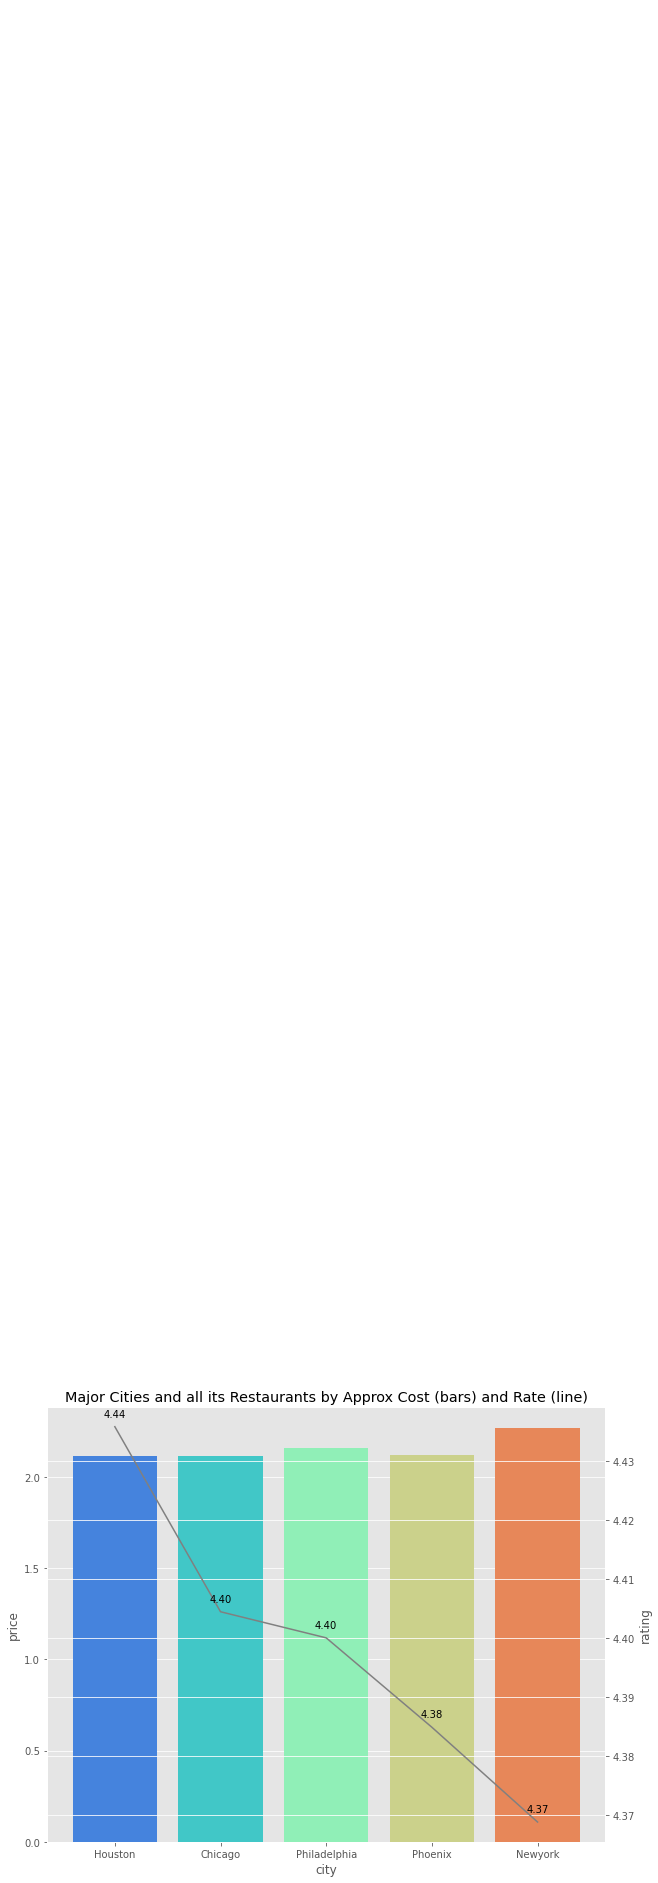

In [554]:
# Grouping data by city
city_group = df2.groupby(by='city', as_index=False).agg({'rating': 'mean',
                                                                               'price': 'mean'})
city_group.sort_values(by='rating', ascending=False, inplace=True)

# Ploting
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='city', y='price', data=city_group, palette='rainbow', 
            order=city_group['city'])
ax2 = ax.twinx()
sns.lineplot(x='city', y='rating', data=city_group, color='gray', ax=ax2, sort=False)

# Labeling line chart (rate)
xs = np.arange(0, len(city_group), 1)
ys = city_group['rating']
for x,y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')
    
# Labeling bar chart (cost)
for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{}'.format(int(y)), (x.mean(), 10), va='bottom', color='white', 
                fontweight='bold')

# Customizing chart

ax.tick_params(axis='x', labelrotation=0)
ax.set_title('Major Cities and all its Restaurants by Approx Cost (bars) and Rate (line)')
plt.show()

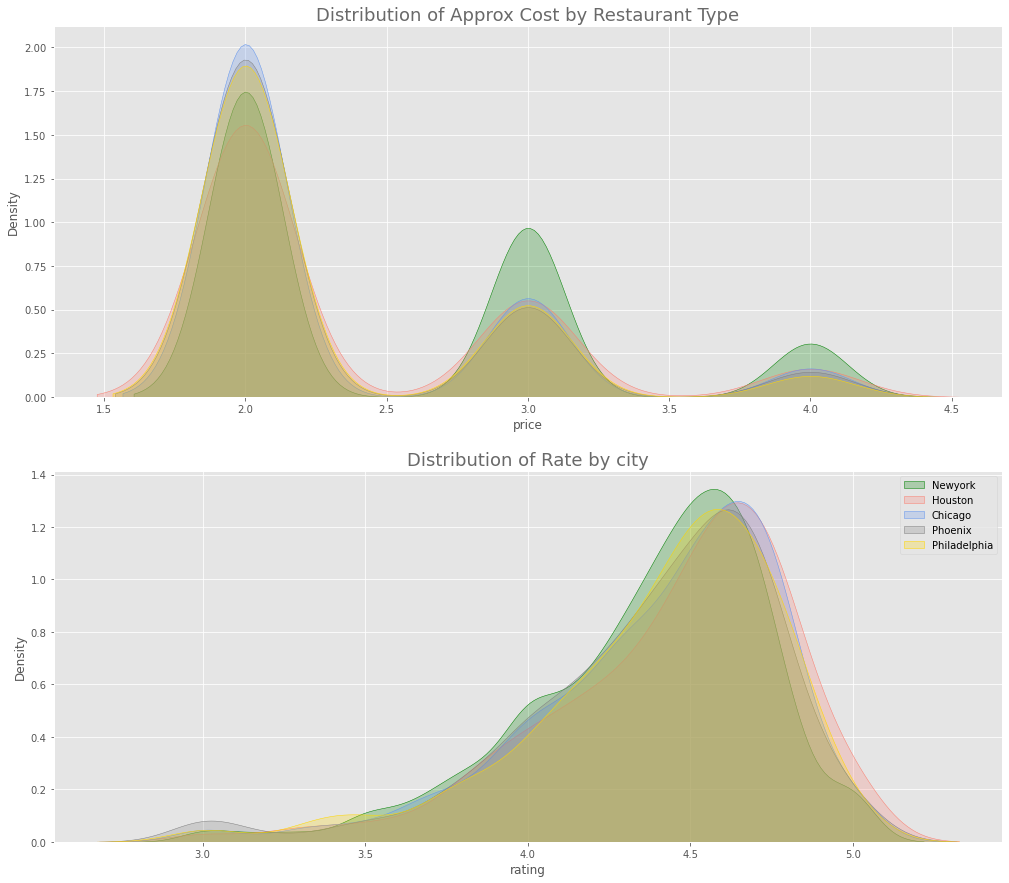

In [555]:
rest_types = list(df2['city'].value_counts().index)
colors = [ 'green', 'salmon', 'cornflowerblue', 'grey', 'gold']

fig, axs = plt.subplots(2, 1, figsize=(17, 15))
for r_type in rest_types:
    idx = rest_types.index(r_type)
    kde_data = df2[(df2['rating'] > 0) & (df2['city'] == r_type)]
    sns.kdeplot(kde_data['price'], ax=axs[0], color=colors[idx], shade=True, label=r_type )
    sns.kdeplot(kde_data['rating'], ax=axs[1], color=colors[idx], shade=True, label=r_type )

# Customizing charts
axs[1].set_title('Distribution of Rate by city', color='dimgrey', size=18)
axs[0].set_title('Distribution of Approx Cost by Restaurant Type', color='dimgrey', size=18)
#plt.legend(handles=label_patches, loc='upper left')
plt.legend()

In [556]:
quick=df2[df2['price']==2]
quick

,name,bookings,rating,reviews,price,cuisine,location,city
2,MAX's Wine Dive Houston - Washington Ave.,40.0,4.8,Exceptional,2,American,Heights / Washington,Houston
3,Brenner's Steakhouse on the Bayou,58.0,4.6,Exceptional,2,Steakhouse,River Oaks,Houston
4,Peli Peli South African Kitchen - Galleria,39.0,4.5,Awesome,2,Seafood,Galleria / Uptown,Houston
5,MAX's Wine Dive Houston - Fairview St.,48.0,4.5,Awesome,2,American,Midtown / Montrose,Houston
6,The Federal Grill - Shepherd,28.0,4.8,Exceptional,2,American,Heights / Washington,Houston
...,...,...,...,...,...,...,...,...
3423,Cafe Life,NaN,NaN,NaN,2,American,"Chicago, IL",Chicago
3424,Murdock's Memorable Meals,NaN,NaN,NaN,2,American,"Chicago, IL",Chicago
3425,Home Run Inn Pizza - Beverly,NaN,NaN,NaN,2,Pizzeria,"Chicago, IL",Chicago
3426,Bugatti's Steak & Pasta - Ameristar Casino Eas...,NaN,NaN,NaN,2,Steak,"East Chicago, IN",Chicago


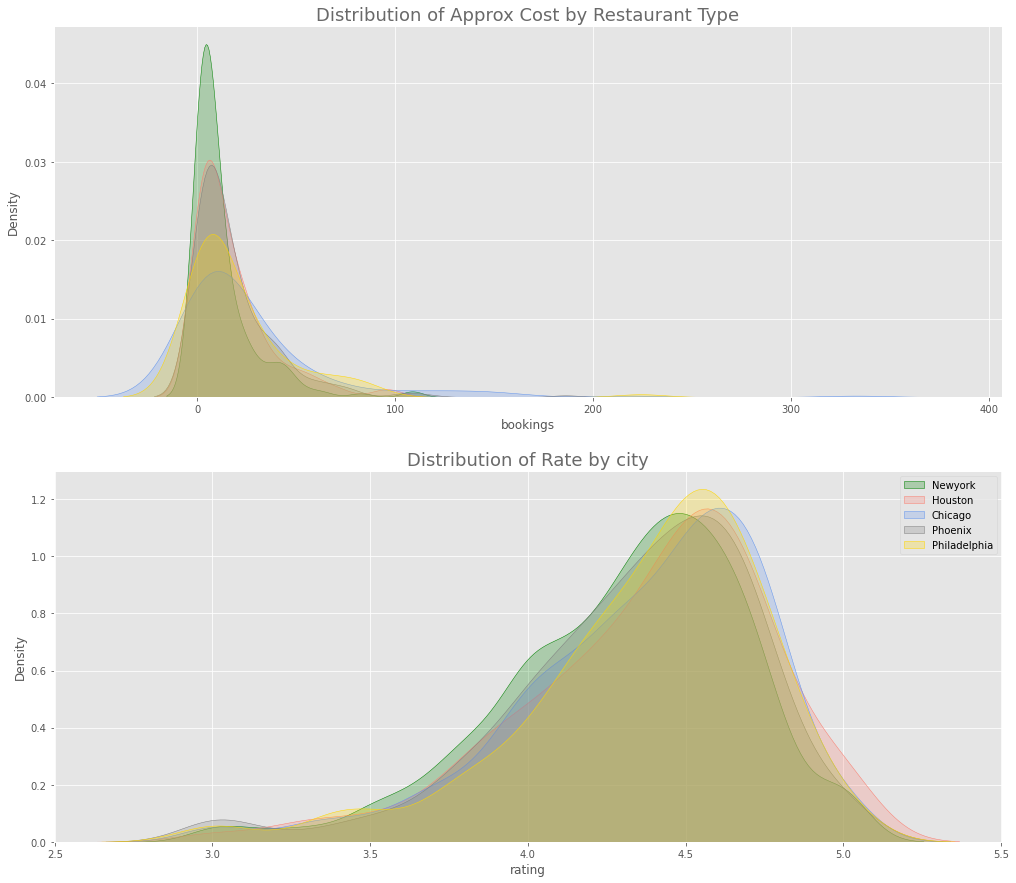

In [557]:
rest_types = list(quick['city'].value_counts().index)
colors = [ 'green', 'salmon', 'cornflowerblue', 'grey', 'gold']

fig, axs = plt.subplots(2, 1, figsize=(17, 15))
for r_type in rest_types:
    idx = rest_types.index(r_type)
    kde_data = quick[(quick['rating'] > 0) & (quick['city'] == r_type)]
    sns.kdeplot(kde_data['bookings'], ax=axs[0], color=colors[idx], shade=True, label=r_type )
    sns.kdeplot(kde_data['rating'], ax=axs[1], color=colors[idx], shade=True, label=r_type )

# Customizing charts
axs[1].set_title('Distribution of Rate by city', color='dimgrey', size=18)
axs[0].set_title('Distribution of Approx Cost by Restaurant Type', color='dimgrey', size=18)
#plt.legend(handles=label_patches, loc='upper left')
plt.legend()

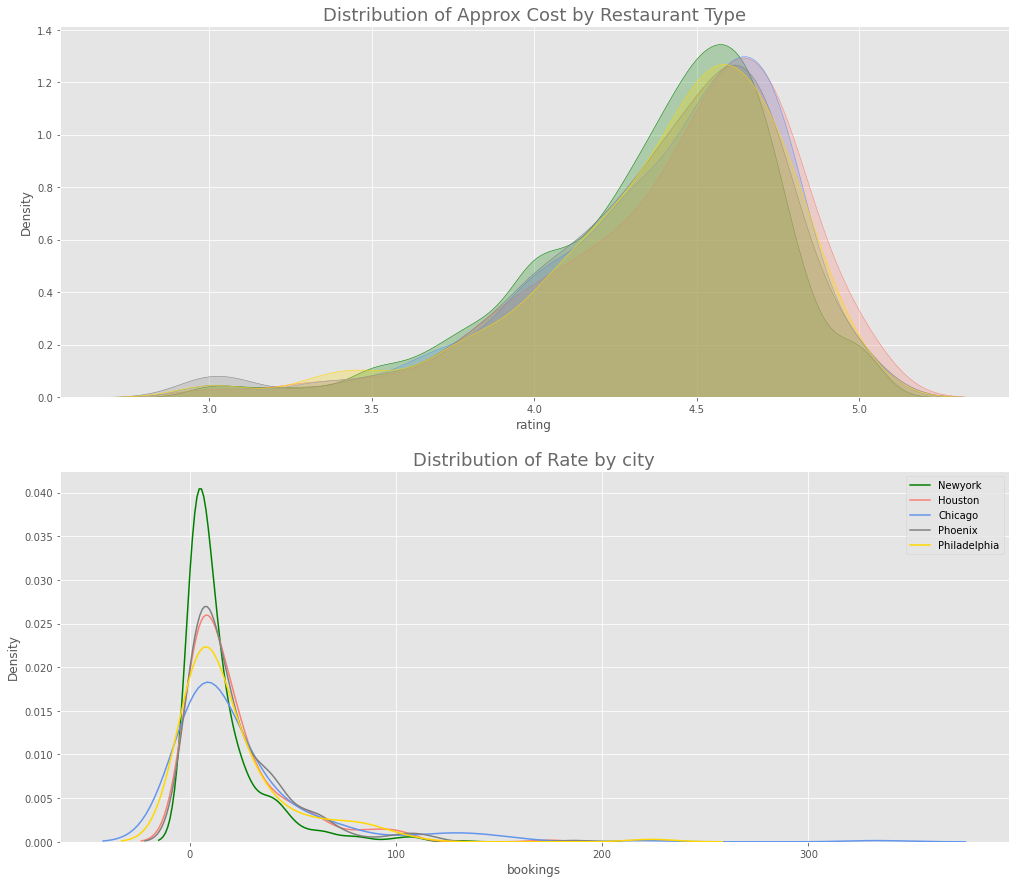

In [558]:
rest_types = list(df2['city'].value_counts().index)
colors = [ 'green', 'salmon', 'cornflowerblue', 'grey', 'gold']

fig, axs = plt.subplots(2, 1, figsize=(17, 15))
for r_type in rest_types:
    idx = rest_types.index(r_type)
    kde_data = df2[(df2['rating'] > 0) & (df2['city'] == r_type)]
    sns.kdeplot(kde_data['rating'], ax=axs[0], color=colors[idx], shade=True, label=r_type )
    sns.kdeplot(kde_data['bookings'], ax=axs[1], color=colors[idx], shade=False, label=r_type )

# Customizing charts
axs[1].set_title('Distribution of Rate by city', color='dimgrey', size=18)
axs[0].set_title('Distribution of Approx Cost by Restaurant Type', color='dimgrey', size=18)
#plt.legend(handles=label_patches, loc='upper left')
plt.legend()

Loading the dataset: Load the data and import the libraries.

Data Cleaning:

Cleaning individual columns.

Data Visualization: Using plots to find relations between the features.

#### Finding the best cheap restaurants:
##### Cheapest, Highest rated and largely voted.

Is there a relation between cuisine,location and the cost?

Exploring the best expensive restaurants.

Restaurants that are expensive, Highest rated and largely voted.

Is there a relation between restaurant type,location and the cost?